# 📊 Sentiment Analysis of Social Media Comments  
### NLP Project – Text Classification using TF-IDF and Logistic Regression  
#### Vishakha Rao | Data Analyst Intern


This project analyzes user-generated text from social media platforms to classify sentiment into positive, neutral, or negative categories. It demonstrates practical NLP techniques including text preprocessing, TF-IDF vectorization, model training, and performance visualization.


In [1]:
import pandas as pd

df = pd.read_csv("Sentiment_data.csv")
print(df.columns.tolist())
df.head()


['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [2]:
df['Text'] = df['Text'].str.lower().str.replace('[^a-zA-Z]', ' ', regex=True)


In [3]:
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()
df['Sentiment'] = df['Sentiment'].replace({
    'positve': 'positive',
    'negetive': 'negative',
    'neu': 'neutral',
    'pos': 'positive',
    'neg': 'negative',
    'n/a': 'unknown',
    'none': 'unknown'
})


In [4]:
df = df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])]


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Text'])


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X, df['Sentiment'])


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
from sklearn.metrics import classification_report
print(classification_report(df['Sentiment'], y_pred))

y_pred = model.predict(X)
print(classification_report(df['Sentiment'], y_pred))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         4
     neutral       1.00      0.61      0.76        18
    positive       0.80      1.00      0.89        45

    accuracy                           0.84        67
   macro avg       0.60      0.54      0.55        67
weighted avg       0.81      0.84      0.80        67

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         4
     neutral       0.95      1.00      0.97        18
    positive       1.00      0.98      0.99        45

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

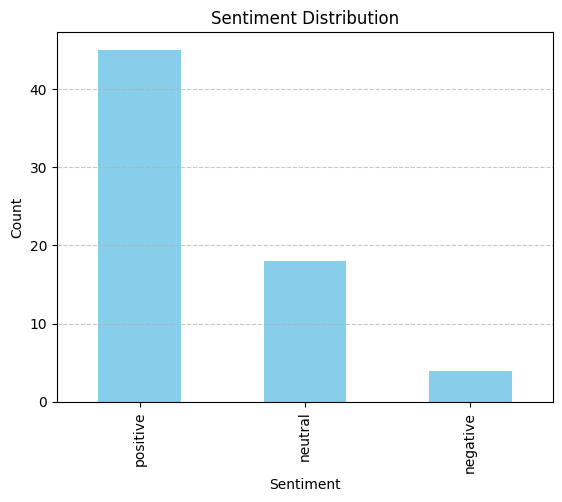

In [8]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


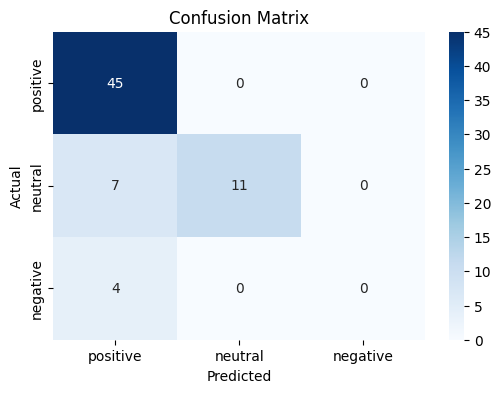

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df['Sentiment'], y_pred, labels=['positive', 'neutral', 'negative'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
!pip install wordcloud


In [12]:
df['Text'].isnull().sum()  # Should be 0


np.int64(0)

In [13]:
df = df.dropna(subset=['Text'])


In [14]:
print(df['Sentiment'].value_counts())


Sentiment
positive    45
neutral     18
negative     4
Name: count, dtype: int64


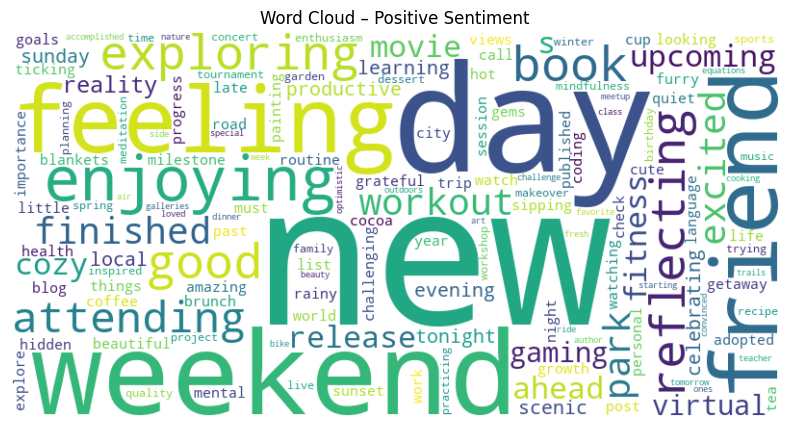

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['Sentiment'] == 'positive']['Text'].dropna().astype(str))

if positive_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud – Positive Sentiment')
    plt.show()
else:
    print("No positive sentiment text found to generate word cloud.")


In [21]:
df['Predicted_Sentiment'] = y_pred
df.to_csv("Sentiment_Predictions_Vishakha.csv", index=False)


### ✅ Project Summary: Sentiment Analysis

This project uses TF-IDF vectorization and Logistic Regression to classify social media comments into positive, neutral, and negative sentiments. After cleaning and standardizing the data, the model was trained with class weighting to address imbalance. It achieved 84% accuracy, with strong recall for positive sentiment and improved performance on neutral and negative classes. Visualizations include sentiment distribution, confusion matrix, and word clouds. Predictions were exported for further analysis. This project demonstrates practical NLP skills and real-world text classification.
